In [81]:
import json
from os import getcwd
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

Directorios

In [29]:
PATH = getcwd() 
PATH_ERR = PATH + "/errors"
PATH_DAT = PATH + "/encodes"

In [82]:
class ErrorViewer:

    def __init__(self, file_label: str):
        self.err_keys = ['errors_training', 'errors_validation']
        self.out_keys = ['output_testing', 'output_training', 'output_validation']
        if not file_label.endswith(".json"):
            file_label += ".json"
        self.err_info = json.load(open(PATH_ERR + "/" + file_label))
        self.file_label = file_label

    def calc_error(self):
        print(f"[ErrorViewer]: Se van a graficar los datos de '{self.file_label}'.")
        for e in self.err_keys:
            _, ax = plt.subplots()
            ax.plot(self.err_info[e])
            ax.set(xlabel='X', ylabel='Y', title = f"{self.file_label}: {e[7:].capitalize()}")
            plt.show()

    def perf_analysis(self, data_label: str):
        print(f"[ErrorViewer]: Se van a clasificar los datos de '{data_label}'.")
        if not data_label.endswith(".json"):
            data_label += ".json"
        path_to_data = PATH_DAT + "/" + data_label
        data_info = json.load(open(path_to_data))
        self.__calc_stats(data_info)

    def __calc_stats(self,data_info: dict):
        class_labels = ["Test", "Train", "Validation"]
        real_classes = [data_info[cl]["Classes"] for cl in class_labels]
        pred_classes = [self.err_info[cl] for cl in self.out_keys]
        curr_class = 0
        for o,c in zip(pred_classes, real_classes):
            tn, fn, fp, tp = 0,0,0,0
            pred_values = [tn,fn,fp,tp]
            for y_pred,y_real in zip(o,c):
                pred_class = max(y_pred)
                y_pred = [int(x==pred_class) for x in y_pred]
                pred_iter = metrics.confusion_matrix(y_real, y_pred).ravel()
                pred_values = [x + x_iter for x,x_iter in zip(pred_values, pred_iter)]
            tn, fn, fp, tp = pred_values
            accuracy = (tp + tn) / (tp + fp + fn + tn)
            precision = tp  / (tp + fp)
            recall = tp / (tp + fn)
            f1_score = 2 * (recall * precision) / (recall + precision)
            print(f"[ErrorViewer] On {class_labels[curr_class]}:")
            print(f"\t[ErrorViewer] ACCURACY = {round(accuracy,3)}")
            print(f"\t[ErrorViewer] PRECISION = {round(precision,3)}")
            print(f"\t[ErrorViewer] RECALL = {round(recall,3)}")
            print(f"\t[ErrorViewer] F1 SCORE = {round(f1_score,3)}")
            print(f"\t[ErrorViewer] Values are tn,fn,fp,tp = {pred_values}")
            curr_class += 1

[ErrorViewer]: Se van a graficar los datos de 'error_1_relu.json'.


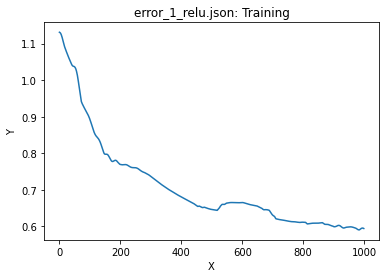

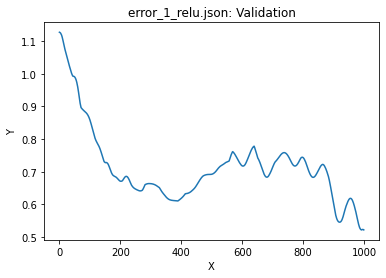

[ErrorViewer]: Se van a clasificar los datos de 'data'.
[ErrorViewer] On Test:
	[ErrorViewer] ACCURACY = 0.511
	[ErrorViewer] PRECISION = 0.6
	[ErrorViewer] RECALL = 0.36
	[ErrorViewer] F1 SCORE = 0.45
	[ErrorViewer] Values are tn,fn,fp,tp = [14, 16, 6, 9]
[ErrorViewer] On Train:
	[ErrorViewer] ACCURACY = 0.744
	[ErrorViewer] PRECISION = 1.0
	[ErrorViewer] RECALL = 0.566
	[ErrorViewer] F1 SCORE = 0.723
	[ErrorViewer] Values are tn,fn,fp,tp = [148, 92, 0, 120]
[ErrorViewer] On Validation:
	[ErrorViewer] ACCURACY = 0.778
	[ErrorViewer] PRECISION = 1.0
	[ErrorViewer] RECALL = 0.6
	[ErrorViewer] F1 SCORE = 0.75
	[ErrorViewer] Values are tn,fn,fp,tp = [20, 10, 0, 15]


In [83]:
ev = ErrorViewer("error_1_relu")
ev.calc_error()
ev.perf_analysis("data")